In [13]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
import math

In [14]:
df = pd.read_csv('ex1data1.txt', header=None)
df.columns = ['X', 'Y']
df.head()

X        Y
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233

In [15]:
# data
x, y = df['X'].values, df['Y'].values
print(x.shape)
x = x[:, np.newaxis]
print(x.shape)
print(y.shape)
y = y[:, np.newaxis]
print(y.shape)

# shape
m, n = df.shape[0], df.shape[1]-1
print(m, n)

(97,)
(97, 1)
(97,)
(97, 1)
97 1


[[-3.63029144]
 [ 1.16636235]]


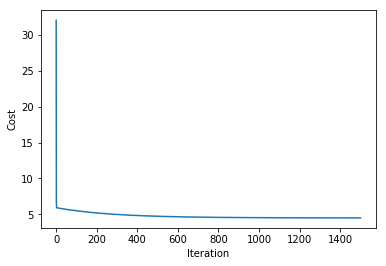

In [16]:
# hypotesis
h0 = np.zeros(n+1)[:, np.newaxis]

# Test
# h0 = np.array([-1, 2])[:, np.newaxis]

# adding bias
ones = np.ones(m).reshape(m, -1)
x_bias = np.hstack([ones, x]).copy()

# Cost
def costJ(x, y, h, m):
    hypotesis = x.dot(h)
    errorTherm = hypotesis - y
    J = sum(errorTherm**2)/(2*m)
    return J

Cost = []
Cost.append(costJ(x_bias, y, h0, m))

def gradientDescent(x, y, h, alpha, m, n, iterations=1500):
    for i in range(iterations):
        error = x.dot(h) - y
        error = (error*x).sum(axis=0)
        error = alpha*error/m
        error = error.reshape(n+1, -1)
        h = h - error
        Cost.append(costJ(x, y, h, m))
    return h
        
h0 = gradientDescent(x_bias, y, h0, 0.01, m, n)

plt.plot(Cost)
plt.ylabel("Cost")
plt.xlabel("Iteration")
print(h0)

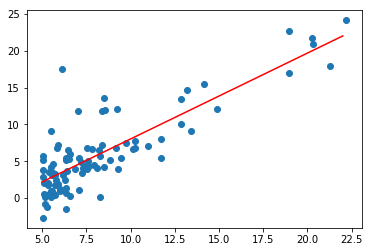

In [17]:
plt.scatter(x, y)

points = np.linspace(5, 22, 100)
eq = h0[0] + (h0[1:]*points).reshape(len(points), -1)
eq

plt.plot(points, eq, color='red')

In [18]:
df = pd.read_csv('ex1data2.txt', header=None)
df.columns = ['X1', 'X2', 'Y']
df.head()

X1  X2       Y
0  2104   3  399900
1  1600   3  329900
2  2400   3  369000
3  1416   2  232000
4  3000   4  539900

In [19]:
# data
x, y = df[['X1', 'X2']].values, df['Y'].values

# shape
m, n = df.shape[0], df.shape[1]-1

print("A base them {} observações com {} colunas de features.".format(m, n))
print(m, n)

x = np.insert(x, 0, 1, axis=1)
y = y.reshape(m, -1)
h0 = np.zeros((1, 3))

def initialize_weights(n_features):
    """ Initialize weights randomly [-1/N, 1/N] """
    limit = 1 / math.sqrt(n_features)
    return np.random.uniform(-limit, limit, (n_features, ))

h0 = initialize_weights(n+1)

def cost(x, y, h):
    m = x.shape[0]
    y_pred = x.dot(h0)
    return ((y_pred - y)**2).sum()/(2*m)

print("O custo inicial é de {:.2f}".format(cost(x, y, h0)))

A base them 47 observações com 2 colunas de features.
47 2
O custo inicial é de 3092086264170.21


Text(0,0.5,'Error')

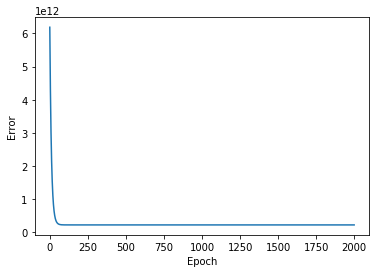

In [20]:
lossList = []

for i in range(2000):
    preds = x.dot(h0).reshape(-1, 1)
    error = preds - y
    loss = np.sum(error ** 2)
    lossList.append(loss)

    # grad = (x.T.dot(error)/x.shape[0]).reshape(1, -1)
    grad = np.sum((error/x.shape[0]*x), axis=0)
    h0 += -grad*0.00000001
    
plt.plot(lossList)
plt.xlabel('Epoch')
plt.ylabel('Error')

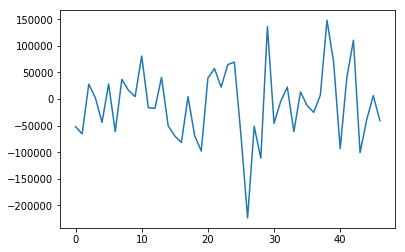

In [21]:
plt.plot(x.dot(h0).reshape(-1, 1)-y)

A base them 506 observações com 13 colunas de features.
506 13
O custo inicial é de 417397.56


Text(0,0.5,'Error')

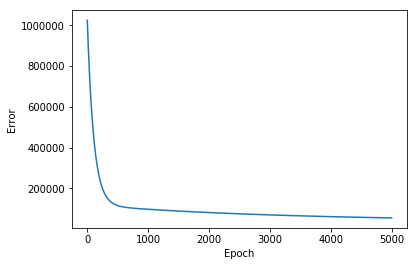

In [75]:
from sklearn.datasets import load_boston
x, y = load_boston()['data'], load_boston()['target']

# shape
m, n = x.shape[0], x.shape[1]

print("A base them {} observações com {} colunas de features.".format(m, n))
print(m, n)

x = np.insert(x, 0, 1, axis=1)
y = y.reshape(m, -1)
h0 = np.zeros((1, 3))

def initialize_weights(n_features):
    """ Initialize weights randomly [-1/N, 1/N] """
    limit = 1 / math.sqrt(n_features)
    return np.random.uniform(-limit, limit, (n_features, ))

h0 = initialize_weights(n+1)

def cost(x, y, h):
    m = x.shape[0]
    y_pred = x.dot(h0)
    return ((y_pred - y)**2).sum()/(2*m)

print("O custo inicial é de {:.2f}".format(cost(x, y, h0)))

lossList = []

for i in range(5000):
    preds = x.dot(h0).reshape(-1, 1)
    error = preds - y
    loss = np.sum(error ** 2)
    lossList.append(loss)

    # grad = (x.T.dot(error)/x.shape[0]).reshape(1, -1)
    grad = np.sum((error/x.shape[0]*x), axis=0)
    h0 += -grad*0.0000002
    
plt.plot(lossList)
plt.xlabel('Epoch')
plt.ylabel('Error')

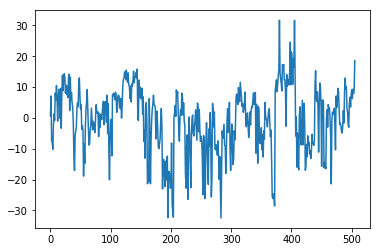

In [76]:
plt.plot(x.dot(h0).reshape(-1, 1) - y)

In [77]:
# performance with log transformation
for i in range(x.shape[1]):
    if i == 0:
        continue
    x[:, i] = np.log(np.clip(x[:, i], 0.01, 10000000))

O custo inicial é de 97779.13


Text(0,0.5,'Error')

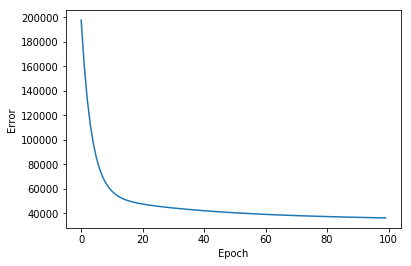

In [78]:
h0 = initialize_weights(n+1)

def cost(x, y, h):
    m = x.shape[0]
    y_pred = x.dot(h0)
    return ((y_pred - y)**2).sum()/(2*m)

print("O custo inicial é de {:.2f}".format(cost(x, y, h0)))

lossList = []

for i in range(100):
    preds = x.dot(h0).reshape(-1, 1)
    error = preds - y
    loss = np.sum(error ** 2)
    lossList.append(loss)

    # grad = (x.T.dot(error)/x.shape[0]).reshape(1, -1)
    grad = np.sum((error/x.shape[0]*x), axis=0)
    h0 += -grad*0.001
    
plt.plot(lossList)
plt.xlabel('Epoch')
plt.ylabel('Error')

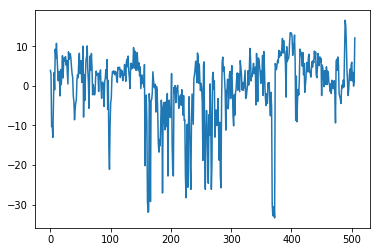

In [80]:
plt.plot(x.dot(h0).reshape(-1, 1) - y)